### policyÂØπÂàõ‰ΩúËÄÖÁöÑÂΩ±ÂìçÔºåÊúâÊó†policyÂâçÂêéÂØπÊØî

#### ‰∏Ä. ÂÖÖÁîµ‰∏ìÂ±ûÊîøÁ≠ñÊúâÊøÄÂä±Âàõ‰ΩúËÄÖËøõË°åÊõ¥Â§öÂàõ‰ΩúÂêó

1. ÂØπÊØîpolicyÂâçÂêéÂàõ‰ΩúËÄÖtotal videoÊï∞Èáè/monthÁöÑÂèòÂåñÔºåtotal video duration/monthÂèòÂåñ

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Load processed data
df = pd.read_parquet("../data/processed/processed_videos.parquet")

1.1 ÂàùÊ¨°Â§ÑÁêÜÔºöÁõ¥Êé•plot monthly video numbers and total duration

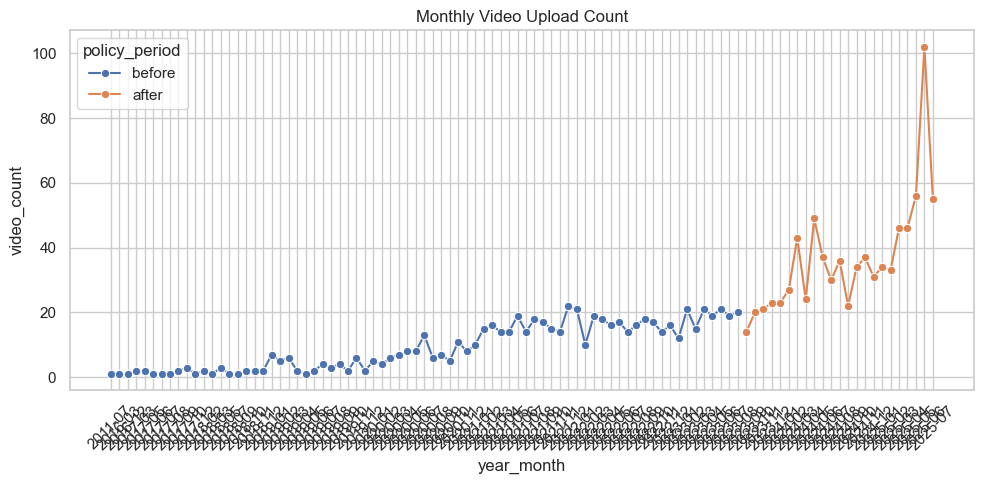

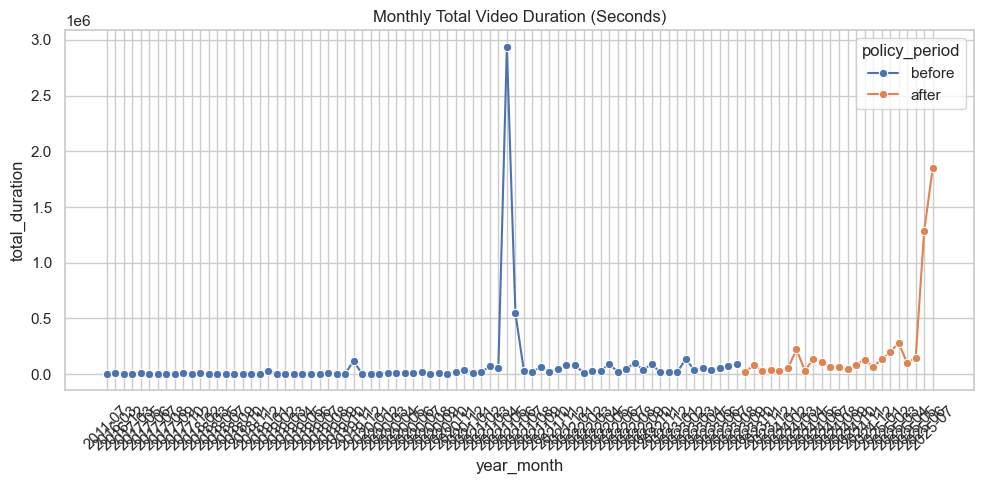

In [5]:
# üìä Task 1: Policy Impact on Upload Volume & Duration

# Create "policy_period" label
df["policy_period"] = df["after_policy"].map({True: "after", False: "before"})

# Group by year_month and policy period
monthly_stats = df.groupby(["year_month", "policy_period"]).agg(
    video_count=("bv", "count"),
    total_duration=("duration", "sum")
).reset_index()

# 
# Plot: Monthly video count
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_stats, x="year_month", y="video_count", hue="policy_period", marker="o")
plt.title("Monthly Video Upload Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Monthly total duration
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_stats, x="year_month", y="total_duration", hue="policy_period", marker="o")
plt.title("Monthly Total Video Duration (Seconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Âú®1.1ÁöÑnaiveÂ§ÑÁêÜÂêéÊàë‰ª¨ÂèëÁé∞Ê≤°ÊúâËÄÉËôë**Âàõ‰ΩúËÄÖÊú¨Ë∫´ÈöèÁùÄÊó∂Èó¥Ëá™ÁÑ∂ÂèòÂåñÁöÑË∂ãÂäø**ÔºåÊúâÂèØËÉΩËØØÊääËøô‰∫õËá™ÁÑ∂Â¢ûÈïøÂΩìÊàêÊîøÁ≠ñÊïàÂ∫î
Âõ†Ê≠§‰∏Ä‰∏ã1.2Â∞Ü**Âä†ÂÖ•Âàõ‰ΩúËÄÖÂõ∫ÂÆöÊïàÂ∫î**Ôºå1.3Â∞Ü**Êó∂Èó¥Âõ∫ÂÆöÊïàÂ∫î**

1.2 Âä†ÂÖ•Âàõ‰ΩúËÄÖÂõ∫ÂÆöÊïàÂ∫î

    Step 1: ÊûÑÂª∫Âàõ‰ΩúËÄÖ√óÊúà‰ªΩÈù¢Êùø (Âàõ‰ΩúËÄÖÊØè‰∏™Êúà‰∏ÄË°åÔºåÂπ∂ÂØπ‚ÄúÊ≤°ÂèëËßÜÈ¢ëÁöÑÊúà‰ªΩ‚ÄùË°• 0 )
    ÊØè‰∏™Âàõ‰ΩúËÄÖÔºåÊØè‰∏™ÊúàÂèë‰∫ÜÂ§öÂ∞ëËßÜÈ¢ëÔºåÊÄªÊó∂ÈïøÊòØÂ§öÂ∞ë
    eg:
<img src="image1-Âàõ‰ΩúËÄÖ*ÊúàÂ∫¶Èù¢Êùø.png" alt="Table Example" width="600">

    ÊúÄÁªàÔºåstep 1Ëøô‰∏ÄÊ≠•ÊòØÂ∞ÜÊï∞ÊçÆÂ≠òÊàê‰∫Ü‰∏Ä‰∏™ÈïøË°®ÔºåËÅöÂêà‰∫ÜÊØè‰∏™Âàõ‰ΩúËÄÖ‰∏Ä‰∏™ÊúàÁöÑËßÜÈ¢ëÊï∞ÈáèÂíåÊÄªÊó∂ÈïøÔºå‰æø‰∫éÂêéÁª≠regression
<img src="image2-ÈïøË°®.png" alt="Table Example" width="600">

In [ ]:
import pandas as pd
import numpy as np

# === ÈÖçÁΩÆÂàóÂêç ===
CREATOR_COL = 'author_mid'       
MONTH_COL   = 'year_month'       # Â∑≤Êúâ year_month
DURATION_COL= 'duration'         # ÊÄªÊó∂ÈïøÁöÑÂàóÂêç
VIDEO_ID_COL= 'bv'               # ËßÜÈ¢ëÂîØ‰∏ÄIDÂàóÔºåÁî®Êù•ËÆ°Êï∞

# 1) Â∞ÜÊó∂Èó¥‰ø°ÊÅØstringÊ†ºÂºèÊîπ‰∏∫timestampÊ†ºÂºèÔºåÊØèÊúàÁ¨¨‰∏ÄÂ§©ÔºåÁ°Æ‰øùÂèØÊéíÂ∫èÔºåeg: 2023-07 (Period[M]) ‚Üí 2023-07-01 00:00:00 (Timestamp)
work = df.copy()
work[MONTH_COL] = pd.to_datetime(work[MONTH_COL]).dt.to_period('M').dt.to_timestamp()

# 2) Êåâ Âàõ‰ΩúËÄÖ√óÊúà‰ªΩ ËÅöÂêàÂà∞ÊúàÂ∫¶
panel = (work
         .groupby([CREATOR_COL, MONTH_COL])
         .agg(video_count_month=(VIDEO_ID_COL, 'count'),
              duration_sum_month=(DURATION_COL, 'sum'))
         .reset_index())

# 3) ‰∏∫ÊØè‰∏™Âàõ‰ΩúËÄÖË°•ÈΩêÂÖ®ËåÉÂõ¥ÂÜÖÁöÑÊâÄÊúâÊúà‰ªΩÔºàÊ≤°ÂèëËßÜÈ¢ëÁöÑÊúà‰πüË¶ÅÊúâ‰∏ÄË°åÔºåÂ°´0Ôºâ
min_m, max_m = panel[MONTH_COL].min(), panel[MONTH_COL].max()
all_months = pd.date_range(min_m, max_m, freq='MS')
creators = panel[CREATOR_COL].unique()
full_index = pd.MultiIndex.from_product([creators, all_months], names=[CREATOR_COL, MONTH_COL])

panel = (panel
         .set_index([CREATOR_COL, MONTH_COL])
         .reindex(full_index)
         .reset_index())

for c in ['video_count_month','duration_sum_month']:
    panel[c] = panel[c].fillna(0)

# 4) ÊûÑÈÄ†ÊîøÁ≠ñÂêéÊ†áËÆ∞ postÔºàÊåâ‰Ω†Âπ≥Âè∞ÁöÑÊ≠£Âºè‰∏äÁ∫øÊúàËÆæÁΩÆÔºâ
policy_date = pd.Timestamp('2023-09-01')
panel['post'] = (panel[MONTH_COL] >= policy_date).astype(int)

# 5) Âè™‰øùÁïô‚ÄúÊîøÁ≠ñÂâçÂêéÈÉΩËá≥Â∞ëÊúâ‰∏§‰∏™ÊúàËßÇÊµã‚ÄùÁöÑÂàõ‰ΩúËÄÖÔºåÈÅøÂÖçÂçï‰æßÊ†∑Êú¨ÂØºËá¥ÂÅèÂ∑Æ
pre_n  = panel[panel[MONTH_COL] <  policy_date].groupby(CREATOR_COL)[MONTH_COL].nunique()
post_n = panel[panel[MONTH_COL] >= policy_date].groupby(CREATOR_COL)[MONTH_COL].nunique()
keep_creators = pre_n[pre_n>=2].index.intersection(post_n[post_n>=2].index)
panel = panel[panel[CREATOR_COL].isin(keep_creators)].copy()





    Step 2: 

In [ ]:
# run %pip install linearmodels  if not installed
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# ËÆæÂÆöÈù¢ÊùøÁ¥¢ÂºïÔºàcreator √ó monthÔºâ
panel_fe = panel.set_index([CREATOR_COL, MONTH_COL]).sort_index()

results = {}
for y_col in ['video_count_month', 'duration_sum_month']:
    exog = sm.add_constant(panel_fe[['post']])       # Ëá™ÂèòÈáèÔºöpostÔºà+Â∏∏Êï∞Ôºâ
    mod  = PanelOLS(panel_fe[y_col], exog,
                    entity_effects=True)             # ‰ªÖÂàõ‰ΩúËÄÖÂõ∫ÂÆöÊïàÂ∫î
    res  = mod.fit(cov_type='clustered',
                   cluster_entity=True)              # ÊåâÂàõ‰ΩúËÄÖËÅöÁ±ªÁ®≥ÂÅ•SE
    results[y_col] = res
    print(f'\n=== Outcome: {y_col} ===')
    print(res.summary)


2. ÊØèÊúàÂÖÖÁîµËßÜÈ¢ëÊØî‰æãÂèòÂåñ

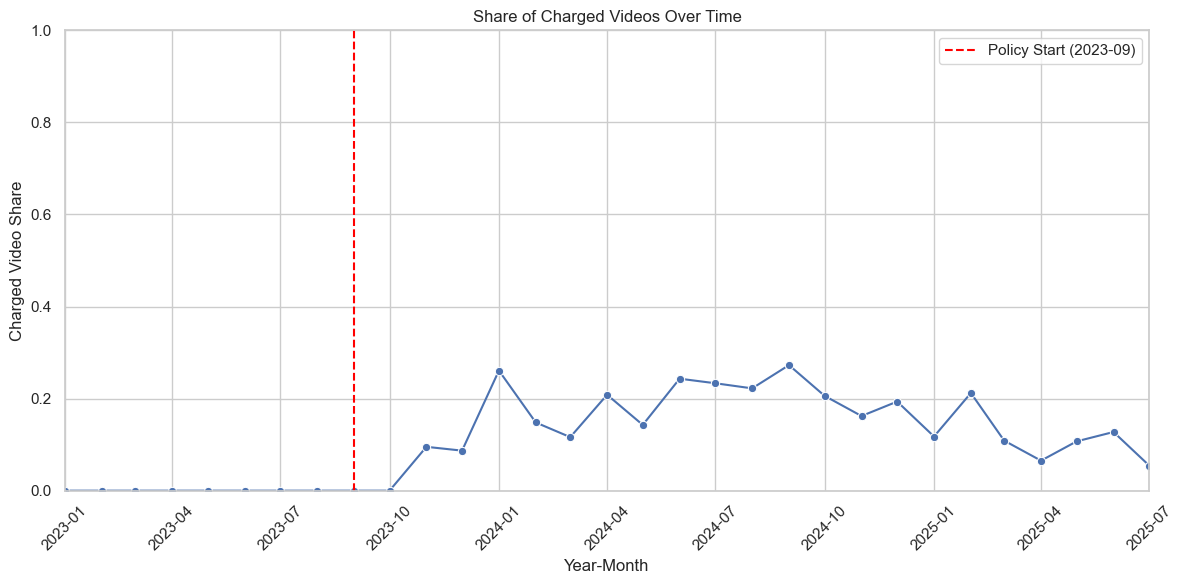

In [7]:
# Ensure datetime format
df['year_month'] = pd.to_datetime(df['year_month'], format="%Y-%m")
# Group by month and calculate share of charged videos
monthly_charged_stats = (
    df.groupby('year_month')['charged']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'charged_share', 'count': 'video_count'})
)
monthly_charged_stats.index = pd.to_datetime(monthly_charged_stats.index)
# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_charged_stats, x=monthly_charged_stats.index, y='charged_share', marker='o')
plt.axvline(pd.to_datetime("2023-09-01"), color="red", linestyle="--", label="Policy Start (2023-09)")
plt.title("Share of Charged Videos Over Time")
plt.ylabel("Charged Video Share")
plt.xlabel("Year-Month")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.xlim(pd.to_datetime("2023-01-01"), df['year_month'].max())  # <-- x-axis range
plt.legend()
plt.tight_layout()
plt.show()


#### ‰∫å. Up‰∏ªÂú®ÂºÄÈÄöÂÖÖÁîµÂäüËÉΩÂêéÈïøÊúüÁöÑengagementÔºàÊí≠Êîæ„ÄÅËØÑËÆ∫„ÄÅÁÇπËµûÔºâÊòØÂê¶ÊúâË°∞ÈÄÄ/ÊèêÂçá

1. ÂØπÊØèÊúàÊâÄÊúâËßÜÈ¢ëÁöÑview, like, comment, ÂèñÂπ≥ÂùáÂÄºËøõË°åË∂ãÂäøÂàÜÊûê

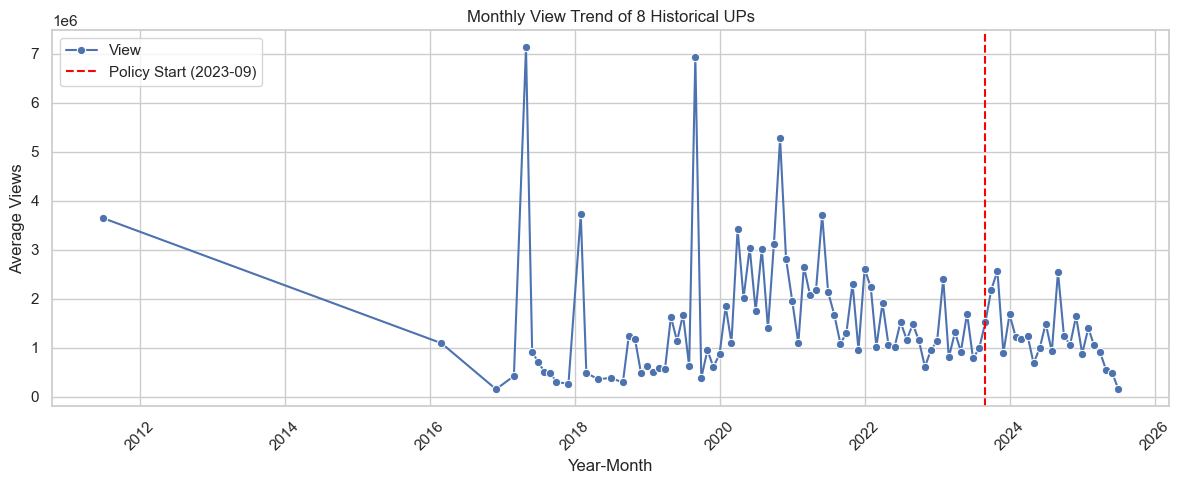

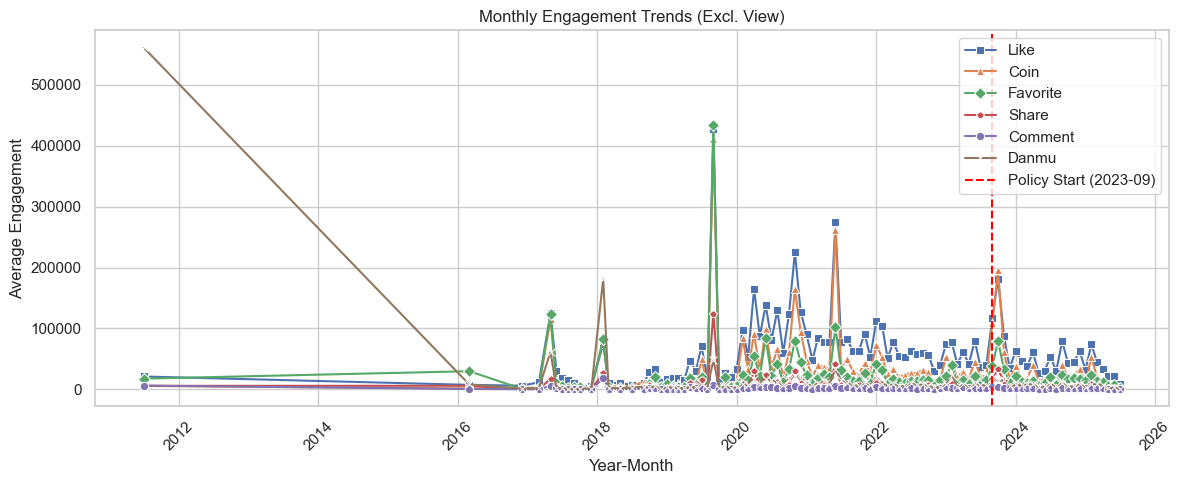

In [8]:
# Â∞Ü8‰ΩçÂéÜÂè≤Á±ªUP‰∏ªfilterÂá∫Êù•
#target_authors = ["È£üË¥´ÈÅì", "Âî†ÁÇπÂéÜÂè≤", "ÂéÜÂè≤Ë∞ÉÁ†îÂÆ§", "ÊÄùÁª¥Á¢∞ÊíûÊú∫", "ÊùéÂîêYo", "Ê£ÆÁ∫≥Êò†Áîª", "Âç¢Ê†ºÊùúÂä™ÂßÜÁöÑÂ••Âè§ÊñØ‰∏Å"]
#df = df[df['author'].isin(target_authors)].copy()

# Á°Æ‰øù year_month ÊòØ datetime Ê†ºÂºè
df['year_month'] = pd.to_datetime(df['year_month'], format="%Y-%m")

# ÊØèÊúàËÅöÂêà engagement ÊåáÊ†á
monthly_stats = (
    df.groupby('year_month')[['view', 'like', 'coin', 'favorite', 'share', 'comment', 'danmaku']]
    .mean()
    .reset_index()
)

# ÁîªviewË∂ãÂäøÂõæ
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_stats, x='year_month', y='view', label='View', marker='o')
plt.axvline(pd.to_datetime("2023-09-01"), color="red", linestyle="--", label="Policy Start (2023-09)")
plt.title("Monthly View Trend of 8 Historical UPs")
plt.xlabel("Year-Month")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ÁîªÂÖ∂‰ªñ engagement ÊåáÊ†áË∂ãÂäøÂõæ
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_stats, x='year_month', y='like', label='Like', marker='s')
sns.lineplot(data=monthly_stats, x='year_month', y='coin', label='Coin', marker='^')
sns.lineplot(data=monthly_stats, x='year_month', y='favorite', label='Favorite', marker='D')
sns.lineplot(data=monthly_stats, x='year_month', y='share', label='Share', marker='p')
sns.lineplot(data=monthly_stats, x='year_month', y='comment', label='Comment', marker='o')
sns.lineplot(data=monthly_stats, x='year_month', y='danmaku', label='Danmu', marker='x')

plt.axvline(pd.to_datetime("2023-09-01"), color="red", linestyle="--", label="Policy Start (2023-09)")
plt.title("Monthly Engagement Trends (Excl. View)")
plt.xlabel("Year-Month")
plt.ylabel("Average Engagement")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




2. ‰∏∫‰∫ÜÂéªÈô§ÊûÅÁ´ØÂÄºÂΩ±ÂìçÔºåËøõË°å‰∏Ä‰∫õÊìç‰Ωú

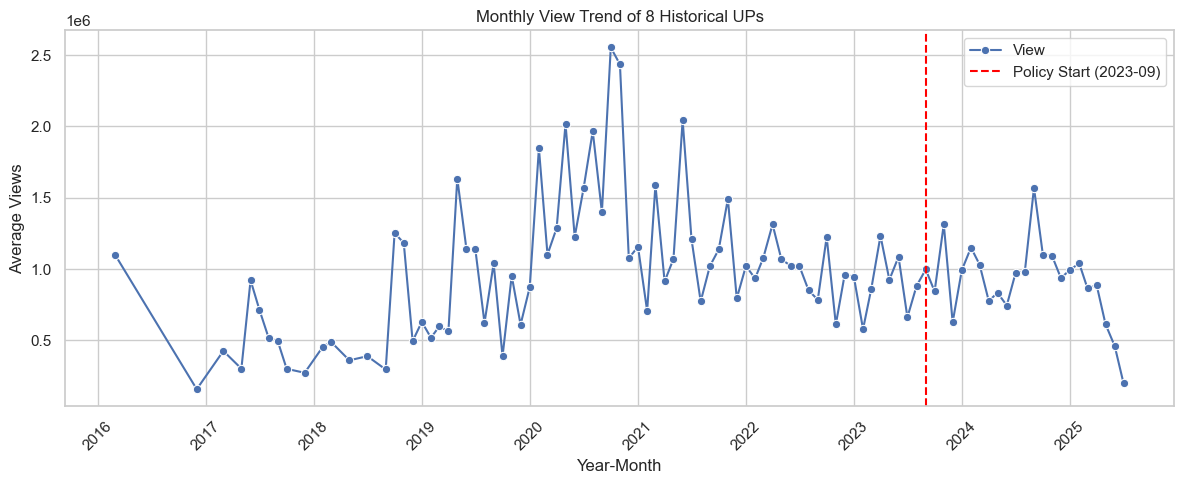

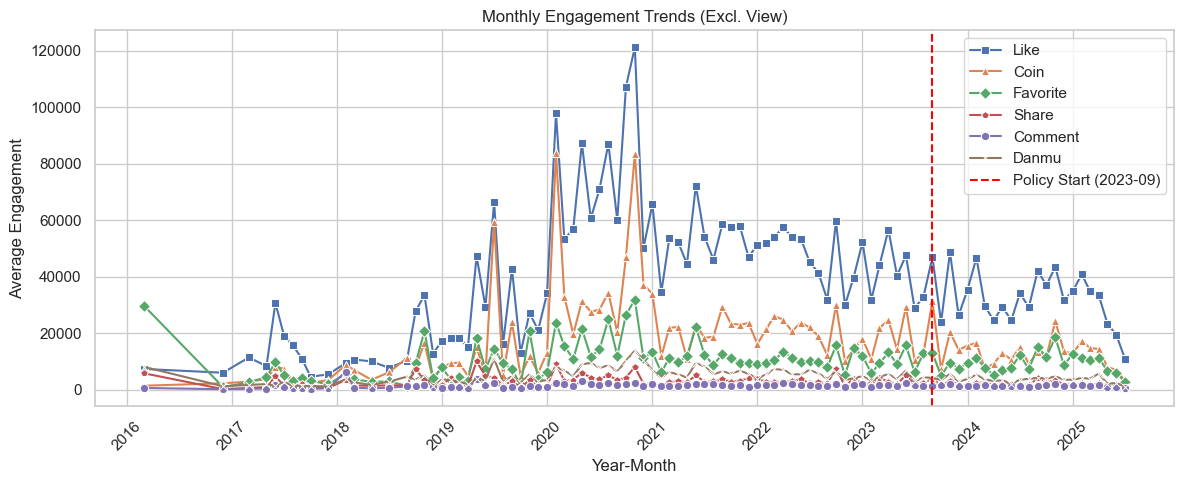

In [9]:
# ÂÆö‰πâË£ÅÂâ™ÂáΩÊï∞ÔºöÂéªÈô§ÊØèÂàó‰∏ä‰∏ã1%ÊûÅÁ´ØÂÄº
def remove_outliers_by_percentile(df, columns, lower=0.01, upper=0.99):
    for col in columns:
        low = df[col].quantile(lower)
        high = df[col].quantile(upper)
        df = df[(df[col] >= low) & (df[col] <= high)]
    return df

# 1. ÂâîÈô§ÊûÅÁ´ØÂÄºÔºà‰∏ä‰∏ã1%Ôºâ
filtered_df = remove_outliers_by_percentile(
    df,
    columns=['view', 'like', 'coin', 'favorite', 'share', 'comment', 'danmaku'],
    lower=0.01,
    upper=0.99
)

# 2. Áî®‰∏≠‰ΩçÊï∞/Âπ≥ÂùáÊï∞ËÅöÂêà
monthly_stats = (
    filtered_df.groupby('year_month')[['view', 'like', 'coin', 'favorite', 'share', 'comment', 'danmaku']]
    .mean()
    .reset_index()
)

# ÁîªviewË∂ãÂäøÂõæ
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_stats, x='year_month', y='view', label='View', marker='o')
plt.axvline(pd.to_datetime("2023-09-01"), color="red", linestyle="--", label="Policy Start (2023-09)")
plt.title("Monthly View Trend of 8 Historical UPs")
plt.xlabel("Year-Month")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ÁîªÂÖ∂‰ªñ engagement ÊåáÊ†áË∂ãÂäøÂõæ
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_stats, x='year_month', y='like', label='Like', marker='s')
sns.lineplot(data=monthly_stats, x='year_month', y='coin', label='Coin', marker='^')
sns.lineplot(data=monthly_stats, x='year_month', y='favorite', label='Favorite', marker='D')
sns.lineplot(data=monthly_stats, x='year_month', y='share', label='Share', marker='p')
sns.lineplot(data=monthly_stats, x='year_month', y='comment', label='Comment', marker='o')
sns.lineplot(data=monthly_stats, x='year_month', y='danmaku', label='Danmu', marker='x')

plt.axvline(pd.to_datetime("2023-09-01"), color="red", linestyle="--", label="Policy Start (2023-09)")
plt.title("Monthly Engagement Trends (Excl. View)")
plt.xlabel("Year-Month")
plt.ylabel("Average Engagement")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()